    Roman Peerboom  10791523
    Floris de Vries 11710799

In [7]:
import numpy as np
import simpy
import random
import statistics 
import time
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
## First in first out system 

def source(env, number, lambda_1, counter, mu):
    """Source generates customers randomly"""
    for i in range(number):
        c = object(env, 'Customer%02d' % i, counter, mu)
        env.process(c)
        t = random.expovariate(lambda_1)     # Time before new customer arrives
        yield env.timeout(t)
        
        
def object(env, name, counter, mu):
    """Customer arrives, is served and leaves."""
    arrive = env.now
#     print('%7.4f %s: Here I am' % (arrive, name))
    with counter.request() as req:
        results = yield req
        wait = env.now - arrive
        waiting_times.append(wait)
        # We got to the counter
#         print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
        tib = random.expovariate(mu)
        yield env.timeout(tib)
#         print('%7.4f %s: Finished' % (env.now, name))

In [9]:
n_s = [1, 2, 4]                              # Number of servers
simulations = 100
mean_waiting_timesro = []
sd_waiting_times = []
for x in range(90):
    mean_waiting_times.append([])
    sd_waiting_times.append([])
ro_s = np.linspace(0.85, 0.99, 3)
clients = np.linspace(10, 150000, 10)
start_time = time.time()
for c_ind in range(len(clients)):
    number_of_arrivals = int(clients[c_ind])
    for r_ind in range(len(ro_s)):
        ro = ro_s[r_ind]    
        for n_ind in range(len(n_s)):
            n = n_s[n_ind]
            lambda_1 = arrival_rate = n/15              # Arrival rate, n/(inter arrival time)
            mu = lambda_1 / (n * ro)                       # Mean time in system        # How much people one server can help for a given time period 
            
            print("\N{greek small letter rho} is: " + str(lambda_1/(n*mu)) + " with lambda: " +
                  str(lambda_1) + " & mu: " + str(mu) +  " for " + str(n) + " server(s).")
            for simulation in range(simulations):
        #         print("Simulation: " + str(simulation))
                waiting_times = []
                env = simpy.Environment()
                server = simpy.Resource(env, capacity=n) 
                env.process(source(env,number_of_arrivals,lambda_1, server, mu))
                env.run(until=100000)
        #         print("Average waiting time for this simulation: " + str(statistics.mean(waiting_times)))
                mean_waiting_timesro[(c_ind*9)+(r_ind*3)+n_ind].append(statistics.mean(waiting_times))
                sd_waiting_times[(c_ind*9)+(r_ind*3)+n_ind].append(statistics.stdev(waiting_times))
            print("Clients: " + str(number_of_arrivals) + " Average waiting time: " + str(statistics.mean(mean_waiting_timesro[(c_ind*9)+(r_ind*3)+n_ind])) +
                  " with sd: " + str(statistics.stdev(mean_waiting_timesro[(c_ind*9)+(r_ind*3)+n_ind])) + "\n")

end_time = time.time()
print("Running time: " + str(end_time - start_time))

ρ is: 0.85 with lambda: 0.06666666666666667 & mu: 0.0784313725490196 for 1 server(s).
Clients: 10 Average waiting time: 16.0809958316067 with sd: 16.741223947846475

ρ is: 0.85 with lambda: 0.13333333333333333 & mu: 0.0784313725490196 for 2 server(s).
Clients: 10 Average waiting time: 4.7718006227810665 with sd: 5.767070347114596

ρ is: 0.85 with lambda: 0.26666666666666666 & mu: 0.0784313725490196 for 4 server(s).
Clients: 10 Average waiting time: 0.7100127305804188 with sd: 1.2695004092404483

ρ is: 0.9199999999999999 with lambda: 0.06666666666666667 & mu: 0.07246376811594203 for 1 server(s).
Clients: 10 Average waiting time: 17.700914899536713 with sd: 16.981410379578687

ρ is: 0.9199999999999999 with lambda: 0.13333333333333333 & mu: 0.07246376811594203 for 2 server(s).
Clients: 10 Average waiting time: 7.054632137413756 with sd: 7.276815663835547

ρ is: 0.9199999999999999 with lambda: 0.26666666666666666 & mu: 0.07246376811594203 for 4 server(s).
Clients: 10 Average waiting time: 

Clients: 83337 Average waiting time: 14.789005319802467 with sd: 1.640428587388786

ρ is: 0.9199999999999999 with lambda: 0.06666666666666667 & mu: 0.07246376811594203 for 1 server(s).
Clients: 83337 Average waiting time: 153.23777563833747 with sd: 61.75027290919741

ρ is: 0.9199999999999999 with lambda: 0.13333333333333333 & mu: 0.07246376811594203 for 2 server(s).
Clients: 83337 Average waiting time: 77.1383526321634 with sd: 19.135511694052887

ρ is: 0.9199999999999999 with lambda: 0.26666666666666666 & mu: 0.07246376811594203 for 4 server(s).
Clients: 83337 Average waiting time: 35.682269420464586 with sd: 7.035353738596464

ρ is: 0.99 with lambda: 0.06666666666666667 & mu: 0.06734006734006734 for 1 server(s).
Clients: 83337 Average waiting time: 668.251196022384 with sd: 436.53983308326093

ρ is: 0.99 with lambda: 0.13333333333333333 & mu: 0.06734006734006734 for 2 server(s).
Clients: 83337 Average waiting time: 383.36695071905507 with sd: 204.63665271608616

ρ is: 0.99 with lamb

In [50]:
mean_mean_waiting_times = []
stdev_waiting_times = []
lower_bound = []
upper_bound = []
for i in range(90):
    mean_mean_waiting_times.append(statistics.mean(mean_waiting_timesro[i]))
    stdev_waiting_times.append(statistics.stdev(mean_waiting_timesro[i]))
    lower_bound.append(mean_mean_waiting_times[i] - (1.96 * statistics.stdev(mean_waiting_timesro[i]) / 100))
    upper_bound.append(mean_mean_waiting_times[i] + (1.96 * statistics.stdev(mean_waiting_timesro[i]) / 100))

In [47]:
print(stdev_waiting_times)

[16.741223947846475, 5.767070347114596, 1.2695004092404483, 16.981410379578687, 7.276815663835547, 1.6054124638157645, 17.767186716991304, 8.766464827488099, 1.9366635610957714, 15.529365580925292, 4.647541190701464, 2.2710798584038066, 41.45943733544098, 12.337620779984396, 7.547968110306933, 364.56201191814677, 247.3601331581162, 124.60647082344711, 12.468343308566963, 4.775143242120114, 1.2877354465013626, 55.5484436486157, 14.613121683523906, 8.22398289900215, 473.5079096523009, 258.7156939782854, 133.70278738044007, 13.361661048755769, 4.317135113061254, 1.4275590964140212, 60.99319293877934, 18.20526738750559, 5.919183607565032, 425.8461543080375, 307.71324100474567, 137.67834089472302, 12.23077476840833, 4.358201298000213, 1.6782259624111926, 61.0090242450309, 20.02444072220087, 6.602927113105747, 391.90140068643103, 237.0030291789001, 134.34988209824516, 13.886114237785302, 4.968709689497011, 1.640428587388786, 61.75027290919741, 19.135511694052887, 7.035353738596464, 436.53983

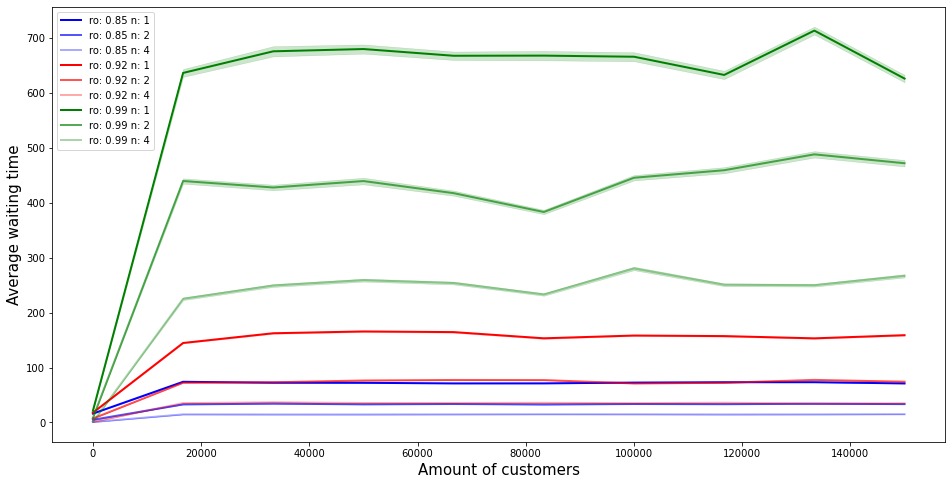

In [61]:
ro_s = [0.85, 0.92, 0.99]
colors = ['b', 'r', 'g']

        
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111, axisbelow=True)
for ro in range(len(ro_s)):
    for n in range(len(n_s)):
        ax.plot(np.linspace(10, 150000, 10), mean_mean_waiting_times[(ro*3)+n::9], color = colors[ro], alpha=1-n/3, lw=2, label= "ro: " + str(ro_s[ro]) + " n: " +str(n_s[n]))
        ax.fill_between(np.linspace(10, 150000, 10), y1 = lower_bound[(ro*3)+n::9], y2 = upper_bound[(ro*3)+n::9], linewidth = 0.5, color=colors[ro], alpha=0.2)
ax.set_xlabel('Amount of customers', size = 15)
ax.set_ylabel('Average waiting time', size = 15)
# # ax.set_ylim(-1,1)
# ax.set_xlim(0,maxmax_steps)
# ax.yaxis.set_tick_params(length=0)
# ax.xaxis.set_tick_params(length=0)
# ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
# legend.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)
# plt.legend(fontsize="x-large")
# ax.set_ylim(-0.3,0.3)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax.spines[spine].set_visible(False)
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(15)
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(15)
# plt.hlines(1.506484, 0, maxmax_steps)
plt.show()

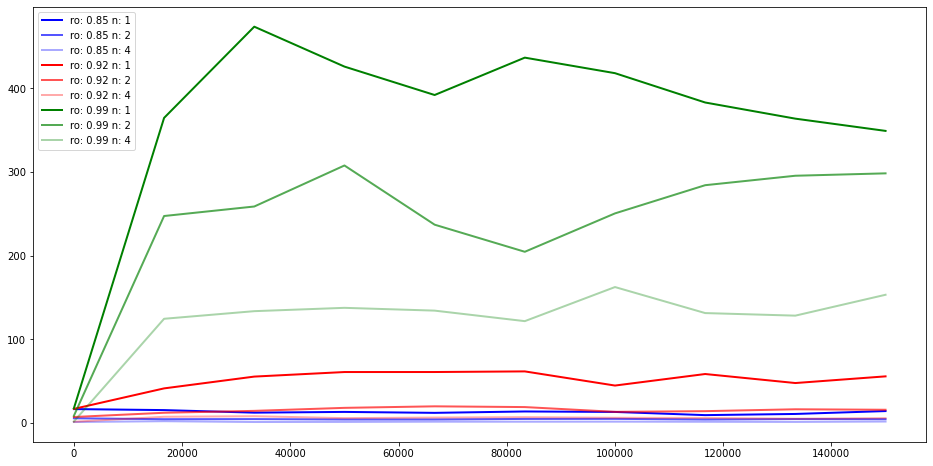

In [86]:

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111, axisbelow=True)
for ro in range(len(ro_s)):
    for n in range(len(n_s)):
        ax.plot(np.linspace(10, 150000, 10), stdev_waiting_times[(ro*3)+n::9], color = colors[ro], alpha=1-n/3, lw=2, label= "ro: " + str(ro_s[ro])+ " n: " +str(n_s[n]))
#ax.fill_between(np.linspace(10, 150000, 10), y1 = lower_bound[(ro*3)+n::9], y2 = upper_bound[(ro*3)+n::9], linewidth = 0.5, color=colors[ro], alpha=0.2)
# ax.set_xlabel('j (number of iterations)', size = 25)
legend = ax.legend()


In [66]:
df_1_ro = pd.DataFrame({'Waiting time': mean_waiting_times[0], 'Method': ['1 server' for i in range(len(mean_waiting_times[0]))], 'service_distr': ['Deterministic' for i in range(len(mean_waiting_times[0]))]})
df_2_ro = pd.DataFrame({'Waiting time': mean_waiting_times[1], 'Method': ['2 servers' for i in range(len(mean_waiting_times[1]))], 'service_distr': ['Deterministic' for i in range(len(mean_waiting_times[0]))]})
df_3_ro = pd.DataFrame({'Waiting time': mean_waiting_times[2], 'Method': ['4 servers' for i in range(len(mean_waiting_times[2]))], 'service_distr': ['Deterministic' for i in range(len(mean_waiting_times[0]))]})


df_totalc = df_total.append(df_1_serverc)
df_totalc = df_totalc.append(df_2_serverc)
df_totalc = df_totalc.append(df_3_serverc)


p = sns.catplot(x="Method", y="Waiting time", hue = 'service_distr', kind="box", data=df_totalc, height=6, aspect=8/8)
# p = sns.swarmplot(x="Method", y="Waiting time", hue = 'service_distr', data=df_totalc, alpha = 0.5)

# plt.xlabel("Amount of servers", size = 20)
# plt.ylabel("Average waiting time", size = 20)
# _, ylabels = plt.yticks()
# _, xlabels = plt.xticks()
# p.set_yticklabels(ylabels, size=15)
# p.set_xticklabels(xlabels, size=15)
# p.set(yscale="log")



NameError: name 'df_1_serverc' is not defined

### statistic_1server = scipy.stats.shapiro(mean_waiting_times[0])
print(statistic_1server)
statistic_2server = scipy.stats.shapiro(mean_waiting_times[1])
print(statistic_2server)
statistic_3server = scipy.stats.shapiro(mean_waiting_times[2])
print(statistic_3server)

print(scipy.stats.mannwhitneyu(mean_waiting_times[0], mean_waiting_times[1]))
print(scipy.stats.mannwhitneyu(mean_waiting_times[1], mean_waiting_times[2]))

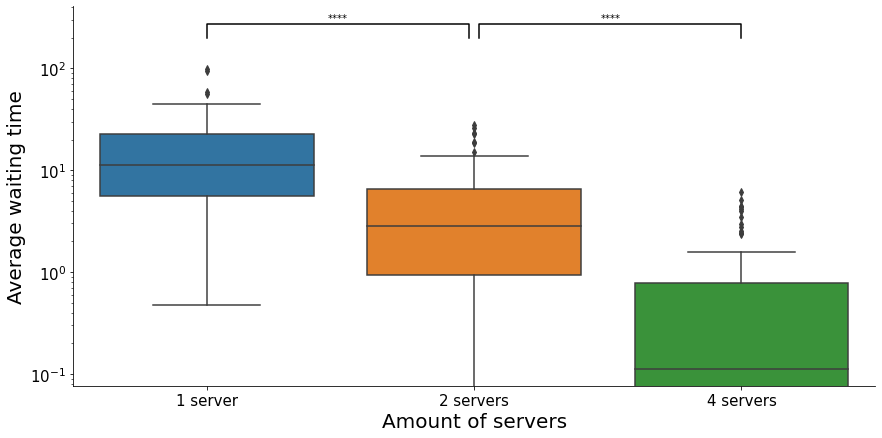

In [62]:
## Plotting the results as boxplots for different methods
df_1_server = pd.DataFrame({'Waiting time': mean_waiting_times[0], 'Method': ['1 server' for i in range(len(mean_waiting_times[0]))], 'service_distr': ['Memoryless' for i in range(len(mean_waiting_times[0]))]})
df_2_server = pd.DataFrame({'Waiting time': mean_waiting_times[1], 'Method': ['2 servers' for i in range(len(mean_waiting_times[1]))], 'service_distr': ['Memoryless' for i in range(len(mean_waiting_times[0]))]})
df_3_server = pd.DataFrame({'Waiting time': mean_waiting_times[2], 'Method': ['4 servers' for i in range(len(mean_waiting_times[2]))], 'service_distr': ['Memoryless' for i in range(len(mean_waiting_times[0]))]})
df_total = df_1_server.append(df_2_server)
df_total = df_total.append(df_3_server)

p = sns.catplot(x="Method", y="Waiting time", kind="box", data=df_total, height=6, aspect=12/6)

plt.xlabel("Amount of servers", size = 20)
plt.ylabel("Average waiting time", size = 20)
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
p.set_yticklabels(ylabels, size=15)
p.set_xticklabels(xlabels, size=15)
p.set(yscale="log")

x1, x2 = 0, 0.98   # columns '1 server' and '2 server' (first column: 0, see plt.xticks())
y, h, col = df_total['Waiting time'].max() + 100, 75, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col)

x3, x4 = 1.02, 2   # columns '2 server' and '4 server' (first column: 0, see plt.xticks())
y1, h1, col = df_total['Waiting time'].max() + 100, 75, 'k'
# y1, h1, col = 1, 0.25, 'k'
plt.plot([x3, x3, x4, x4], [y1, y1+h1, y1+h1, y1], lw=1.5, c=col)
plt.text((x3+x4)*.5, y1+h1, "****", ha='center', va='bottom', color=col)

plt.savefig('boxplots_server_amount.png', format='png', dpi=600, bbox_inches = "tight")


## FIFO versus priority ot the smallest job for 1 server

In [ ]:
## Give priority to the smallest job

def source_prior(env, number, lambda_1, counter, mu):
    """Source generates customers randomly"""
    for i in range(number):
        c = object_prior(env, 'Customer%02d' % i, counter, mu)
        env.process(c)
        t = random.expovariate(lambda_1)
        yield env.timeout(t)
        
        
def object_prior(env, name, counter, mu):
    """Customer arrives, is served and leaves."""
    arrive = env.now
#     print('%7.4f %s: Here I am' % (arrive, name))
    tib = random.expovariate(mu)
    with counter.request(priority = tib) as req:
        results = yield req
        wait = env.now - arrive
        waiting_times_priority.append(wait)
        # We got to the counter
#         print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))

        yield env.timeout(tib)
#         print('%7.4f %s: Finished' % (env.now, name))

In [ ]:
start_time = time.time()

n = 1                                       # Number of servers
lambda_1 = arrival_rate = n/15              # Arrival rate, events in given time period
time_in_system = 14                         # Mean time in system 
mu = 1/time_in_system                      # How much people one server can help for a given time period 
simulations = 100
number_of_arrivals = 10000000000
print("\N{greek small letter rho} is: " + str(lambda_1/(n*mu)) + " with lambda: " +
      str(lambda_1) + " & mu: " + str(mu) +  " for " + str(n) + " server(s).")

mean_waiting_times_priority = []
for simulation in range(simulations):
#         print("Simulation: " + str(simulation))
    waiting_times_priority = []
    env = simpy.Environment()
    server = simpy.PriorityResource(env, capacity=n) 
    env.process(source_prior(env,number_of_arrivals,lambda_1, server, mu))
    env.run(until=1000000)
    mean_waiting_times_priority.append(statistics.mean(waiting_times_priority))    
print("Average waiting time: " + str(statistics.mean(mean_waiting_times_priority)) +
      " with sd: " + str(statistics.stdev(mean_waiting_times_priority)) + "\n")
    
end_time = time.time()
print("Running time: " + str(end_time - start_time))

In [ ]:
statistic_1server_FIFO = scipy.stats.shapiro(mean_waiting_times[0])
print(statistic_1server)
statistic_1server_prior = scipy.stats.shapiro(mean_waiting_times_priority)
print(statistic_1server_prior)

print(scipy.stats.mannwhitneyu(mean_waiting_times[0], mean_waiting_times_priority))

In [63]:
df_1_server_LOFF = pd.DataFrame({'Waiting time': mean_waiting_times[0], 'Method': ['FIFO' for i in range(len(mean_waiting_times[0]))]})
df_1_server_prior = pd.DataFrame({'Waiting time': mean_waiting_times_priority, 'Method': ['Priority for smallest job' for i in range(len(mean_waiting_times_priority))]})
df_total_1_server = df_1_server_LOFF.append(df_1_server_prior)

p = sns.catplot(x="Method", y="Waiting time", kind="box", data=df_total_1_server, height=6, aspect=12/6)

plt.xlabel("Amount of servers", size = 20)
plt.ylabel("Average waiting time", size = 20)
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
p.set_yticklabels(ylabels, size=15)
p.set_xticklabels(xlabels, size=15)
# p.set(yscale="log")

x1, x2 = 0, 1   # columns 'LOFF' and 'Priority' (first column: 0, see plt.xticks())
y, h, col = df_total['Waiting time'].max() + 10, 7.5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col)

plt.savefig('boxplots_1server_LOFF_priority.png', format='png', dpi=600, bbox_inches = "tight")


NameError: name 'mean_waiting_times_priority' is not defined

## Different service rate distribution times

### M/D/1 vs M/D/n queues

In [ ]:
## First in first out system 
def sourcec(env, number, lambda_1, counter, mu):
    """Source generates customers randomly"""
    for i in range(number):
        c = objectc(env, 'Customer%02d' % i, counter, mu)
        env.process(c)
        t = random.expovariate(lambda_1)     # Time before new customer arrives
        yield env.timeout(t)
        
        
def objectc(env, name, counter, mu):
    """Customer arrives, is served and leaves."""
    arrive = env.now
#     print('%7.4f %s: Here I am' % (arrive, name))
    with counter.request() as req:
        results = yield req
        wait = env.now - arrive
        waiting_timesc.append(wait)
        # We got to the counter
#         print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
        tib = 1/mu
        yield env.timeout(tib)
#         print('%7.4f %s: Finished' % (env.now, name))

In [ ]:
n_s = [1, 2, 4]                              # Number of servers
simulations = 100
mean_waiting_timesc = [[],[],[]]

start_time = time.time()

for n_ind in range(len(n_s)):
    n = n_s[n_ind]
    lambda_1 = arrival_rate = n/15              # Arrival rate, n/(inter arrival time)
    time_in_system = 14                        # Mean time in system 
    mu = 1/time_in_system                      # How much people one server can help for a given time period 
    number_of_arrivals = 10000000000
    print("\N{greek small letter rho} is: " + str(lambda_1/(n*mu)) + " with lambda: " +
          str(lambda_1) + " & mu: " + str(mu) +  " for " + str(n) + " server(s).")
    for simulation in range(simulations):
#         print("Simulation: " + str(simulation))
        waiting_timesc = []
        env = simpy.Environment()
        server = simpy.Resource(env, capacity=n) 
        env.process(sourcec(env,number_of_arrivals,lambda_1, server, mu))
        env.run(until=1000000)
#         print("Average waiting time for this simulation: " + str(statistics.mean(waiting_times)))
        mean_waiting_timesc[n_ind].append(statistics.mean(waiting_timesc))    
    print("Average waiting time: " + str(statistics.mean(mean_waiting_timesc[n_ind])) +
          " with sd: " + str(statistics.stdev(mean_waiting_timesc[n_ind])) + "\n")
    
end_time = time.time()
print("Running time: " + str(end_time - start_time))

In [ ]:
statistic_1serverc = scipy.stats.shapiro(mean_waiting_timesc[0])
print(statistic_1serverc)
statistic_2serverc = scipy.stats.shapiro(mean_waiting_timesc[1])
print(statistic_2serverc)
statistic_3serverc = scipy.stats.shapiro(mean_waiting_timesc[2])
print(statistic_3serverc)

print(scipy.stats.mannwhitneyu(mean_waiting_timesc[0], mean_waiting_times[0]))
print(scipy.stats.mannwhitneyu(mean_waiting_timesc[1], mean_waiting_times[1]))
print(scipy.stats.mannwhitneyu(mean_waiting_timesc[2], mean_waiting_times[2]))

In [ ]:
df_1_serverc = pd.DataFrame({'Waiting time': mean_waiting_timesc[0], 'Method': ['1 server' for i in range(len(mean_waiting_timesc[0]))], 'service_distr': ['Deterministic' for i in range(len(mean_waiting_timesc[0]))]})
df_2_serverc = pd.DataFrame({'Waiting time': mean_waiting_timesc[1], 'Method': ['2 servers' for i in range(len(mean_waiting_timesc[1]))], 'service_distr': ['Deterministic' for i in range(len(mean_waiting_timesc[0]))]})
df_3_serverc = pd.DataFrame({'Waiting time': mean_waiting_timesc[2], 'Method': ['4 servers' for i in range(len(mean_waiting_timesc[2]))], 'service_distr': ['Deterministic' for i in range(len(mean_waiting_timesc[0]))]})


df_totalc = df_total.append(df_1_serverc)
df_totalc = df_totalc.append(df_2_serverc)
df_totalc = df_totalc.append(df_3_serverc)


p = sns.catplot(x="Method", y="Waiting time", hue = 'service_distr', kind="box", data=df_totalc, height=6, aspect=8/8)
# p = sns.swarmplot(x="Method", y="Waiting time", hue = 'service_distr', data=df_totalc, alpha = 0.5)

plt.xlabel("Amount of servers", size = 20)
plt.ylabel("Average waiting time", size = 20)
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
p.set_yticklabels(ylabels, size=15)
p.set_xticklabels(xlabels, size=15)
p.set(yscale="log")

# x1, x2 = 0, 0.98   # columns '1 server' and '2 server' (first column: 0, see plt.xticks())
# y, h, col = df_total['Waiting time'].max() + 100, 75, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col)

# x3, x4 = 1.02, 2   # columns '2 server' and '4 server' (first column: 0, see plt.xticks())
# y1, h1, col = df_total['Waiting time'].max() + 100, 75, 'k'
# # y1, h1, col = 1, 0.25, 'k'
# plt.plot([x3, x3, x4, x4], [y1, y1+h1, y1+h1, y1], lw=1.5, c=col)
# plt.text((x3+x4)*.5, y1+h1, "****", ha='center', va='bottom', color=col)

plt.savefig('boxplots_service_distr.png', format='png', dpi=600, bbox_inches = "tight")


### Longtail distribution

In [ ]:
def source_long(env, number, lambda_1, counter, mu):
    """Source generates customers randomly"""
    for i in range(number):
        c = object_long(env, 'Customer%02d' % i, counter, mu)
        env.process(c)
        t = random.expovariate(lambda_1)     # Time before new customer arrives
        yield env.timeout(t)
        
        
def object_long(env, name, counter, mu):
    """Customer arrives, is served and leaves."""
    arrive = env.now
#     print('%7.4f %s: Here I am' % (arrive, name))
    with counter.request() as req:
        results = yield req
        wait = env.now - arrive
        waiting_times_long.append(wait)
        # We got to the counter
#         print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
        rand_serv = random.random()
        if rand_serv < 0.75:
            tib = random.expovariate(mu[0])
        else:
            tib = random.expovariate(mu[1])
        yield env.timeout(tib)
#         print('%7.4f %s: Finished' % (env.now, name))

In [ ]:
n_s = [1, 2, 4]                              # Number of servers
simulations = 100
mean_waiting_times_long = [[],[],[]]

start_time = time.time()

for n_ind in range(len(n_s)):
    n = n_s[n_ind]
    lambda_1 = arrival_rate = n/15              # Arrival rate, n/(inter arrival time)
    mu = [1/4, 1/(52/17)]                     # How much people one server can help for a given time period 
    number_of_arrivals = 10000000000
    print("\N{greek small letter rho} is: " + str(lambda_1/(n*(1/14))) + " with lambda: " +
          str(lambda_1) + " & mu: " + str(1/14) +  " for " + str(n) + " server(s).")
    for simulation in range(simulations):
#         print("Simulation: " + str(simulation))
        waiting_times_long = []
        env = simpy.Environment()
        server = simpy.Resource(env, capacity=n) 
        env.process(source_long(env,number_of_arrivals,lambda_1, server, mu))
        env.run(until=1000000)
        mean_waiting_times_long[n_ind].append(statistics.mean(waiting_times_long)) 
    print("Average waiting time: " + str(statistics.mean(mean_waiting_times_long[n_ind])) +
          " with sd: " + str(statistics.stdev(mean_waiting_times_long[n_ind])) + "\n")
    
end_time = time.time()
print("Running time: " + str(end_time - start_time))